# 1. 环境设置

In [17]:
import matplotlib
# matplotlib.use('Agg')  # 使用Agg后端

import sys
import os
import warnings
warnings.filterwarnings('ignore')
sys.path.append('.')

#  2. 导入基础库

In [18]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# 设置中文字体
try:
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial Unicode MS']
    plt.rcParams['axes.unicode_minus'] = False
except:
    pass

In [19]:
def setup_chinese_font():
    """设置中文字体"""
    try:
        import matplotlib.font_manager as fm
        available_fonts = [f.name for f in fm.fontManager.ttflist]
        if any('WenQuanYi' in font for font in available_fonts):
            matplotlib.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei', 'WenQuanYi Micro Hei', 'DejaVu Sans']
            print("使用文泉驿中文字体")
        elif any('SimHei' in font for font in available_fonts):
            matplotlib.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
            print("使用SimHei中文字体")
        else:
            matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']
            print("使用英文字体")
        matplotlib.rcParams['axes.unicode_minus'] = False
        return True
    except Exception as e:
        print(f"字体设置失败: {e}")
        matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']
        matplotlib.rcParams['axes.unicode_minus'] = False
        return False

# 3. 导入PaddlePaddle并设置设备

In [20]:
import paddle

def setup_paddle_device():
    try:
        paddle.set_device("iluvatar_gpu:0")
        return "iluvatar_gpu:0"
    except:
        try:
            paddle.set_device("gpu:0")
            return "gpu:0"
        except:
            paddle.set_device("cpu")
            return "cpu"

device_type = setup_paddle_device()
print(f"设备: {device_type}")


设备: iluvatar_gpu:0


# 4. 导入评估模块

In [21]:
try:
    from evaluate_model_paddle import (
        ModelEvaluator,
        VisualizationManager,
        load_test_data_using_data_utils,
        to_hwc_batch,
        generate_comparison_report,
        save_detailed_results,
    )
    print("评估模块导入成功")
    
    evaluator = ModelEvaluator()
    print("ModelEvaluator初始化成功")
    
except Exception as e:
    print(f"导入失败: {e}")
    import traceback
    traceback.print_exc()


评估模块导入成功
ModelEvaluator初始化成功


# 5. 配置路径

In [22]:
BASELINE_MODEL_PATH = '/home/aistudio/work/fixed_baseline_model/model.pkl'
EVALUATION_RESULTS_DIR = 'evaluation_results'

print(f"基准模型路径: {BASELINE_MODEL_PATH}")
print(f"结果目录: {EVALUATION_RESULTS_DIR}")


基准模型路径: /home/aistudio/work/fixed_baseline_model/model.pkl
结果目录: evaluation_results


# 6. 数据加载

使用文泉驿中文字体
使用data_utils加载测试数据...
正在加载数据...
从processed_data加载预处理数据...
数据加载成功！
  训练集形状: (27446, 64, 64, 3) - 标签: 27446
  验证集形状: (5881, 64, 64, 3) - 标签: 5881
  测试集形状: (5882, 64, 64, 3) - 标签: 5882

数据统计:
  训练集范围: [0.000, 1.000]
  训练集均值: 0.337, 标准差: 0.266
  标签唯一值: 43, 范围: [0, 42]

数据分布统计:
  训练集: 27446 样本, 43 个类别
  验证集: 5881 样本, 43 个类别
  测试集: 5882 样本, 43 个类别

  创建数据集...
创建数据加载器...

显示一个训练样本用于验证:


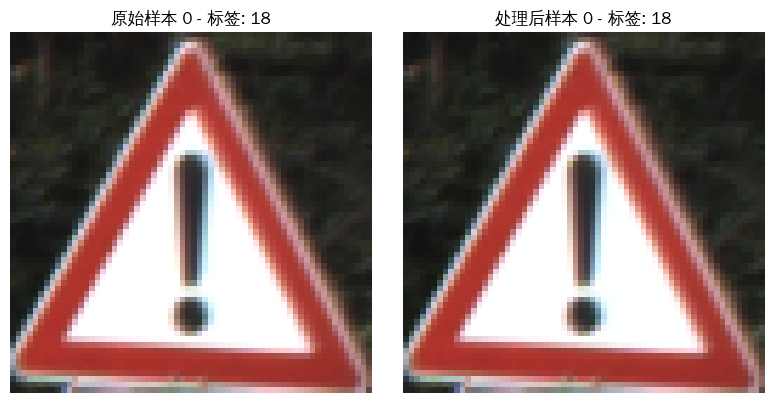

数据加载成功:
  测试集原始数据: (5882, 64, 64, 3) - 5882 样本
应用数据集预处理...
数据处理完成:
  处理后形状: (5882, 3, 64, 64)
  处理后范围: [-2.1179, 2.6400]
数据加载成功
图像形状: (5882, 3, 64, 64)
标签形状: (5882,)
样本数量: 5882
类别数量: 43


In [23]:
setup_chinese_font()
try:
    X_test, y_test = load_test_data_using_data_utils()
    print(f"数据加载成功")
    print(f"图像形状: {X_test.shape}")
    print(f"标签形状: {y_test.shape}")
    print(f"样本数量: {len(y_test)}")
    print(f"类别数量: {len(np.unique(y_test))}")
    
except Exception as e:
    print(f"数据加载失败: {e}")
    import traceback
    traceback.print_exc()

# 7. CNN模型评估

In [24]:
try:
    # 加载CNN模型
    print("加载CNN模型...")
    model_info = evaluator.load_cnn_model()
    print(f"模型参数: {model_info['total_params']:,}")
    
    # 评估CNN模型（使用已加载的数据）
    print("评估CNN模型...")
    cnn_metrics = evaluator.evaluate_cnn_model(
        model_info['model'], 
        X_test=X_test,  # 直接使用第6单元格加载的数据
        y_test=y_test   # 直接使用第6单元格加载的数据
    )
    
    print(f"\nCNN评估结果:")
    print(f"准确率: {cnn_metrics['accuracy']:.4f} ({cnn_metrics['accuracy']*100:.2f}%)")
    if 'loss' in cnn_metrics:
        print(f"损失: {cnn_metrics['loss']:.4f}")
    if 'f1_weighted' in cnn_metrics:
        print(f"F1分数: {cnn_metrics['f1_weighted']:.4f}")
        
except Exception as e:
    print(f"CNN评估失败: {e}")
    import traceback
    traceback.print_exc()

加载CNN模型...
加载飞桨模型: trained_models/traffic_sign_cnn_paddle_final_20251225_151312.pdparams
模型参数: 116,715
评估CNN模型...

CNN评估结果:
准确率: 0.9959 (99.59%)
损失: 0.0151
F1分数: 0.9959


#  8. 基准模型评估

In [25]:
if os.path.exists(BASELINE_MODEL_PATH):
    try:
        # 转换数据格式
        print("转换数据格式...")
        X_test_hwc = to_hwc_batch(X_test)
        
        # 评估基准模型
        print("评估基准模型...")
        baseline_metrics = evaluator.evaluate_baseline_model(
            BASELINE_MODEL_PATH, X_test_hwc, y_test
        )
        
        print(f"\n基准模型评估结果:")
        print(f"准确率: {baseline_metrics['accuracy']:.4f} ({baseline_metrics['accuracy']*100:.2f}%)")
        
        # 保存基准预测结果供后续使用
        global_baseline_metrics = baseline_metrics
        
    except Exception as e:
        print(f"基准模型评估失败: {e}")
        baseline_metrics = None
else:
    print("跳过基准模型评估（文件不存在）")
    baseline_metrics = None

转换数据格式...
评估基准模型...
加载基准模型...
标准pickle反序列化失败，使用重映射Unpickler: Can't get attribute 'EnhancedHOGFeatureExtractor' on <module '__main__'>
正在提取增强版HOG特征...
参数: orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2)
  已处理: 0/5882
  已处理: 1000/5882
  已处理: 2000/5882
  已处理: 3000/5882
  已处理: 4000/5882
  已处理: 5000/5882
✓ HOG特征提取完成: (5882, 972)
  特征维度: 972
  特征均值: 0.1324, 标准差: 0.1012

基准模型评估结果:
准确率: 0.9543 (95.43%)


# 9. 可视化

使用文泉驿中文字体
生成CNN混淆矩阵...


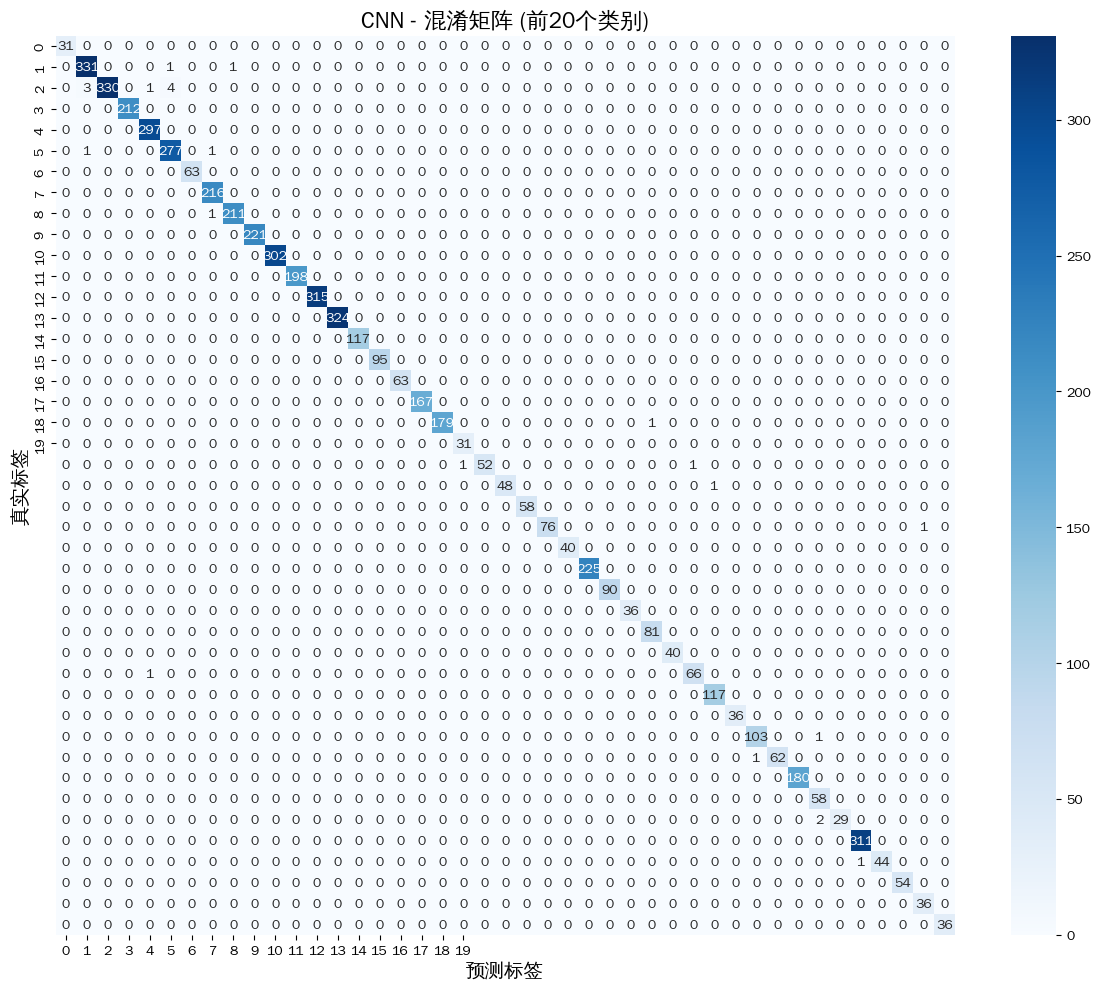


前20个类别的准确率:
  类别  0: 100.00% (31/31)
  类别  1: 99.40% (331/333)
  类别  2: 97.63% (330/338)
  类别  3: 100.00% (212/212)
  类别  4: 100.00% (297/297)
  类别  5: 99.28% (277/279)
  类别  6: 100.00% (63/63)
  类别  7: 100.00% (216/216)
  类别  8: 99.53% (211/212)
  类别  9: 100.00% (221/221)
  类别 10: 100.00% (302/302)
  类别 11: 100.00% (198/198)
  类别 12: 100.00% (315/315)
  类别 13: 100.00% (324/324)
  类别 14: 100.00% (117/117)
  类别 15: 100.00% (95/95)
  类别 16: 100.00% (63/63)
  类别 17: 100.00% (167/167)
  类别 18: 99.44% (179/180)
  类别 19: 100.00% (31/31)
生成基准模型混淆矩阵...


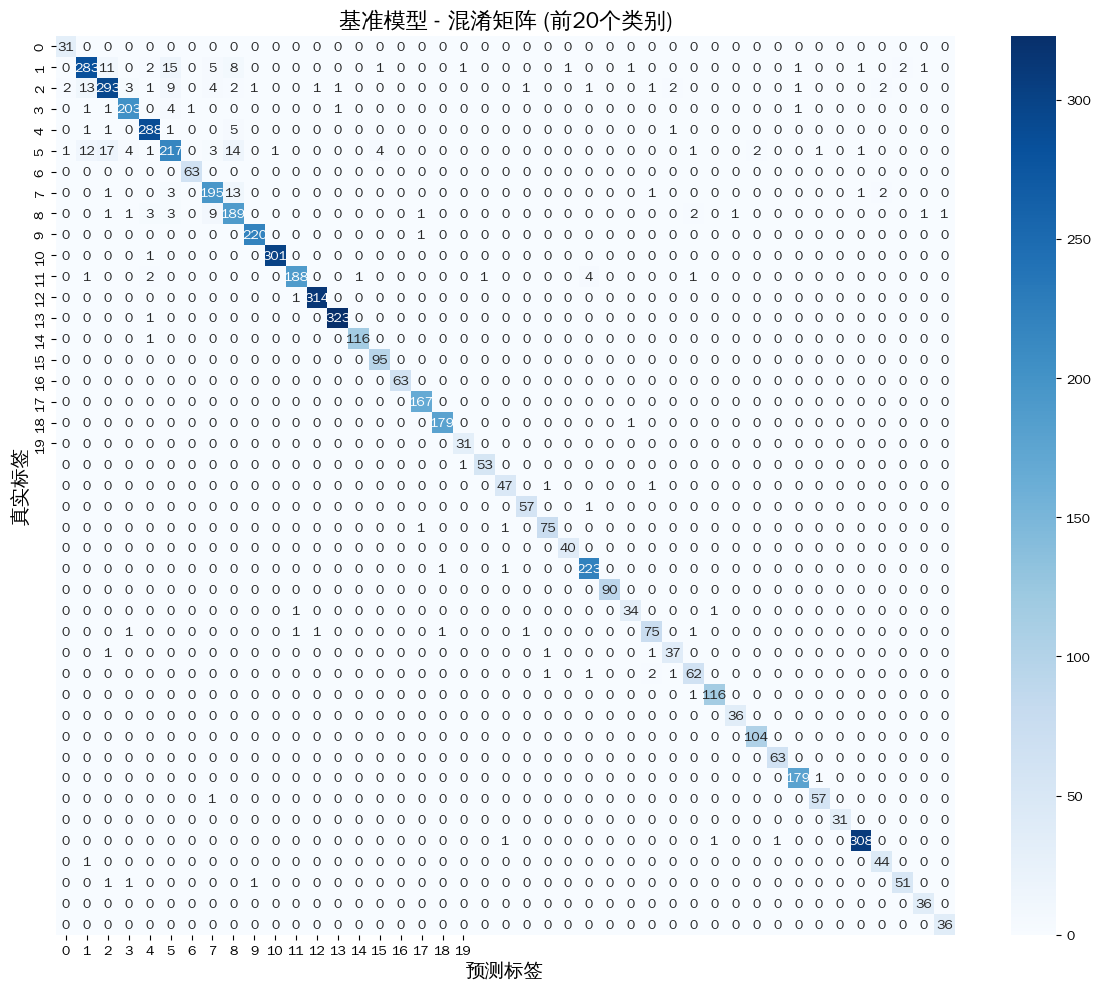


前20个类别的准确率:
  类别  0: 100.00% (31/31)
  类别  1: 84.98% (283/333)
  类别  2: 86.69% (293/338)
  类别  3: 95.75% (203/212)
  类别  4: 96.97% (288/297)
  类别  5: 77.78% (217/279)
  类别  6: 100.00% (63/63)
  类别  7: 90.28% (195/216)
  类别  8: 89.15% (189/212)
  类别  9: 99.55% (220/221)
  类别 10: 99.67% (301/302)
  类别 11: 94.95% (188/198)
  类别 12: 99.68% (314/315)
  类别 13: 99.69% (323/324)
  类别 14: 99.15% (116/117)
  类别 15: 100.00% (95/95)
  类别 16: 100.00% (63/63)
  类别 17: 100.00% (167/167)
  类别 18: 99.44% (179/180)
  类别 19: 100.00% (31/31)
可视化完成


In [26]:
setup_chinese_font()
visualizer = VisualizationManager(EVALUATION_RESULTS_DIR)

try:
    # 可视化CNN混淆矩阵
    if 'cnn_metrics' in locals() and 'confusion_matrix' in cnn_metrics:
        print("生成CNN混淆矩阵...")
        visualizer.plot_confusion_matrix(
            cnn_metrics['confusion_matrix'], 
            model_name="CNN"
        )
    
    # 可视化基准模型混淆矩阵
    if 'baseline_metrics' in locals() and baseline_metrics is not None and 'confusion_matrix' in baseline_metrics:
        print("生成基准模型混淆矩阵...")
        visualizer.plot_confusion_matrix(
            baseline_metrics['confusion_matrix'], 
            model_name="基准模型"
        )
    print("可视化完成")
    
except Exception as e:
    print(f"可视化失败: {e}")

#  10. 模型对比


指标              基准模型       CNN模型      提升        
--------------------------------------------------
准确率             0.9543     0.9959     +0.0417 (+4.4%)
F1分数            0.9538     0.9959     +0.0421 (+4.4%)


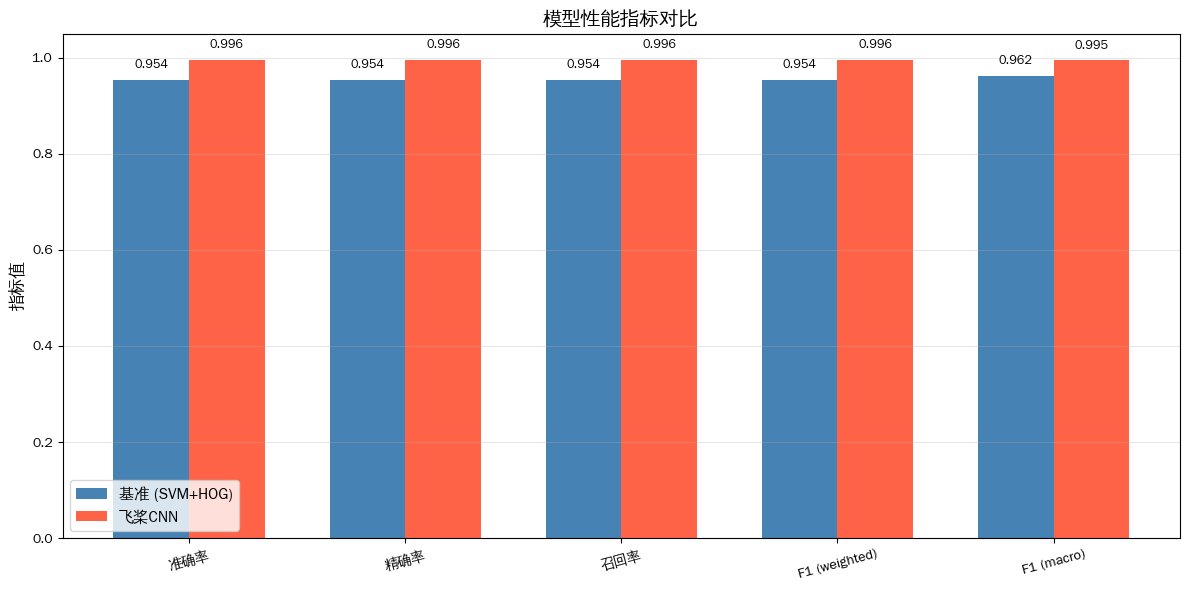

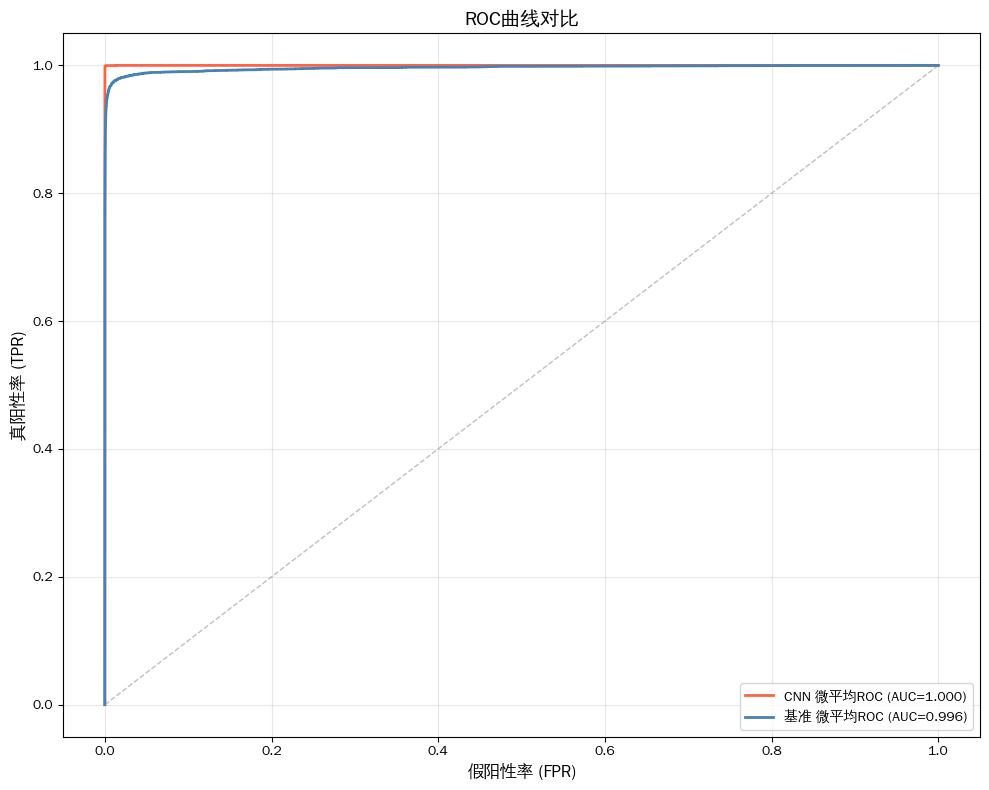

In [27]:
if 'cnn_metrics' in locals() and 'baseline_metrics' in locals() and baseline_metrics is not None:
    print(f"\n{'指标':<15} {'基准模型':<10} {'CNN模型':<10} {'提升':<10}")
    print("-" * 50)
    
    # 对比准确率
    if 'accuracy' in cnn_metrics and 'accuracy' in baseline_metrics:
        acc_cnn = cnn_metrics['accuracy']
        acc_base = baseline_metrics['accuracy']
        improvement = acc_cnn - acc_base
        improvement_pct = (improvement / acc_base * 100) if acc_base > 0 else 0
        print(f"{'准确率':<15} {acc_base:.4f}     {acc_cnn:.4f}     {improvement:+.4f} ({improvement_pct:+.1f}%)")
    
    # 对比F1分数
    if 'f1_weighted' in cnn_metrics and 'f1_weighted' in baseline_metrics:
        f1_cnn = cnn_metrics['f1_weighted']
        f1_base = baseline_metrics['f1_weighted']
        improvement = f1_cnn - f1_base
        improvement_pct = (improvement / f1_base * 100) if f1_base > 0 else 0
        print(f"{'F1分数':<15} {f1_base:.4f}     {f1_cnn:.4f}     {improvement:+.4f} ({improvement_pct:+.1f}%)")
    if 'cnn_metrics' in locals() and 'baseline_metrics' in locals():
        visualizer.plot_metrics_comparison(cnn_metrics, baseline_metrics)
    # 2. 绘制ROC对比图
    if (hasattr(evaluator, 'cnn_predictions') and 
        hasattr(evaluator, 'baseline_predictions') and
        evaluator.cnn_predictions.get('y_probs') is not None and
        evaluator.baseline_predictions.get('scores') is not None and
        'y_test' in locals()):
        
        try:
            auc_cnn, auc_base = visualizer.plot_roc_comparison(
                evaluator.cnn_predictions['y_probs'],  # CNN概率分数
                evaluator.baseline_predictions['scores'],  # 基准模型分数
                y_test  # 真实标签
            )
        except Exception as e:
            print(f"ROC对比失败: {e}")

#  11. 保存结果

In [28]:
try:
    # 保存CNN结果
    if 'cnn_metrics' in locals():
        print(f"CNN准确率: {cnn_metrics.get('accuracy', 0):.4f}")
        
    # 保存基准结果
    if 'baseline_metrics' in locals() and baseline_metrics is not None:
        print(f"基准准确率: {baseline_metrics.get('accuracy', 0):.4f}")
    
    # 对比
    if 'cnn_metrics' in locals() and 'baseline_metrics' in locals() and baseline_metrics is not None:
        cnn_acc = cnn_metrics.get('accuracy', 0)
        base_acc = baseline_metrics.get('accuracy', 0)
        improvement = cnn_acc - base_acc
        print(f"准确率提升: {improvement:+.4f}")
    
    print(f"结果目录: {EVALUATION_RESULTS_DIR}")
    
except Exception as e:
    print(f"保存结果时出错: {e}")

CNN准确率: 0.9959
基准准确率: 0.9543
准确率提升: +0.0417
结果目录: evaluation_results
